## Functions, Import Statements:

In [33]:
import matplotlib.pyplot as plt
import numpy as np
import math
import scipy.stats as ss
import pandas as pd

def mylen(data):
    size = 0
    for i in data:
        size = size + 1
    return size

def mysum(data):
    s = 0
    for i in data:
        s = s + i
    return s

def mymean(data):
    Sum = 0
    for i in data:
        Sum = Sum + i
    return Sum/mylen(data)

def DET(matrix):
    Sum = 0
    
    Sum = Sum + matrix[0][0] * (matrix[1][1]*matrix[2][2] - matrix[2][1]*matrix[1][2])
    Sum = Sum - matrix[0][1] * (matrix[1][0]*matrix[2][2] - matrix[2][0]*matrix[1][2])
    Sum = Sum + matrix[0][2] * (matrix[1][0]*matrix[2][1] - matrix[2][0]*matrix[1][1])
    
    return Sum

def drawPlotParabola(x, y, Ycal):
    plt.plot(x, y)
    plt.xlabel('x - axis')
    plt.ylabel('y - axis')
    plt.title('Parabola Regression')
    plt.show()

    plt.plot(x, Ycal)
    plt.xlabel('x - axis')
    plt.ylabel('y - axis')
    plt.title("Best Fit")
    plt.show()

def drawPlotLine(x, y, Ycal):
    plt.plot(x, y)
    plt.xlabel('x - axis')
    plt.ylabel('y - axis')
    plt.title('Linear Regression')
    plt.show()

    plt.plot(x, Ycal)
    plt.xlabel('x - axis')
    plt.ylabel('y - axis')
    plt.title("Best Fit")
    plt.show()
    
def CovXY(x, y):
    n = mylen(x)
    meanX = mymean(x)
    meanY = mymean(y)
    
    SumXY = mysum(np.multiply(x, y))
    
    CovXY = SumXY/n - meanX*meanY
    
    return CovXY
    
def SD(x):
    n = mylen(x)
    meanx = mymean(x)
    
    Sumx2 = mysum(np.multiply(x, x))
    
    Var = Sumx2/n - meanx**2
    
    return math.sqrt(Var)

## WEEK 1:

X values:  [1 2 3 4 5 6 7 8 9]
Y values:  [10 20 30 40 50 60 70 80 90]
Slope (m):  10.0
Constant (c):  0.0
Y Calculated values:  [10. 20. 30. 40. 50. 60. 70. 80. 90.]
The Linear Regression Line for the given data:
Y = 10.0X + 0.0
Sum of Squares due to Total:  6000.0
Sum of Squares due to Treatments:  6000.0
Sum of Squares due to Error:  0.0
R Square value:  1.0


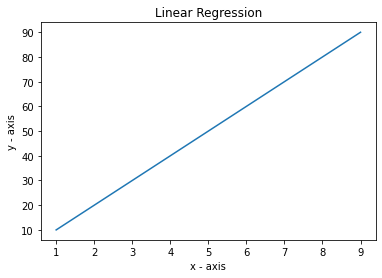

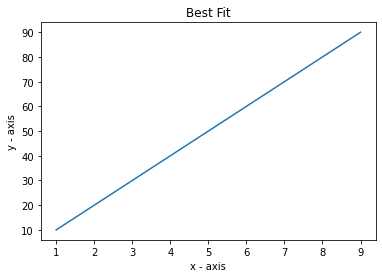

The Y Calculated values is the best fit for the given data


In [7]:
# Straight Line Best Fit:

def LinearRegression(x, y):
    n = mylen(x)
    m = mylen(y)
    
    if n != m:
        print("Invalid Data!")
        return
    
    slope = (n*mysum(np.multiply(x,y)) - mysum(x)*mysum(y)) / (n*mysum(np.multiply(x,x)) - mysum(x)**2)
    
    constant = (mysum(y) - slope*mysum(x)) / n
    
    Ycal = np.add(np.multiply(slope,x),constant)
    
    meanY = mymean(y)
    
    SST = mysum(np.array([(i-meanY)**2 for i in y]))
    SSE = mysum(np.multiply(np.subtract(y, Ycal),np.subtract(y, Ycal)))
    SSR = mysum(np.array([(i-meanY)**2 for i in Ycal]))
    
    Rsq = SSR/SST
    # Rsq = 1 - SSE/SST
    
    print("X values: ",x)
    print("Y values: ",y)
    print("Slope (m): ",slope)
    print("Constant (c): ",constant)
    print("Y Calculated values: ",Ycal)
    print("The Linear Regression Line for the given data:")
    print(f"Y = {slope}X + {constant}")
    print("Sum of Squares due to Total: ",SST)
    print("Sum of Squares due to Treatments: ",SSR)
    print("Sum of Squares due to Error: ",SSE)
    print("R Square value: ",Rsq)
    
    drawPlotLine(x, y, Ycal)
    
    if Rsq > 0.9:
        print("The Y Calculated values is the best fit for the given data")
    else:
        print("The Y Calculated values is not the best fit for the given data")
        
x = np.array([float(i) for i in input("Enter x values: ").strip().split()])
y = np.array([float(i) for i in input("Enter y values: ").strip().split()])

# x = np.array([1,2,3,4,5,6,7,8,9])
# y = np.array([10,20,30,40,50,60,70,80,90])

LinearRegression(x, y)

## WEEK 2:

X values:  [ 2  4  6  8 10]
Y values:  [ 3.07 12.85 31.47 57.38 91.29]
a =  0.6959999999984368
b =  -0.8550714285712041
c =  0.991964285714291
Y Calculated values:  [ 2.95371429 13.14714286 31.27628571 57.34114286 91.34171429]
The Parabola Regression Line for the given data: 
Y = 0.6959999999984368 + -0.8550714285712041X + 0.991964285714291X2
Sum of Squares due to Total:  5103.33208
Sum of Squares due to Treatments:  5103.188554285969
Sum of Squares due to Error:  0.14352571428571234
R Square value:  0.9999718760778681


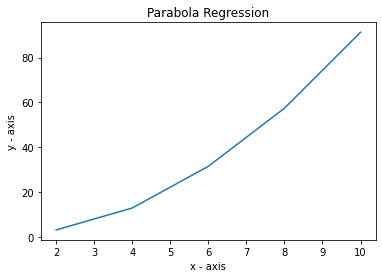

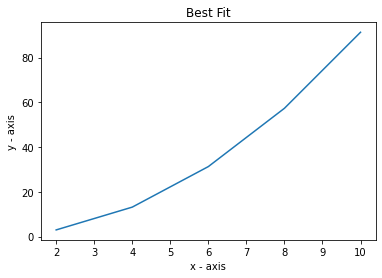

The Y Calculated values is the best fit for the given data


In [18]:
# Parabola Best Fit:

def ParabolaRegression(x, y):
    n = mylen(x)
    m = mylen(y)

    if n != m:
        print("Invalid Data: ")
        return
    
    x2 = np.multiply(x, x)
    x3 = np.multiply(x2, x)
    x4 = np.multiply(x3, x)
    xy = np.multiply(x, y)
    x2y = np.multiply(x2, y)
    
    Sumx = mysum(x)
    Sumx2 = mysum(x2)
    Sumx3 = mysum(x3)
    Sumx4 = mysum(x4)
    Sumy = mysum(y)
    Sumxy = mysum(xy)
    Sumx2y = mysum(x2y)
    
    delta  = DET([[n, Sumx, Sumx2],
                  [Sumx, Sumx2, Sumx3],
                  [Sumx2, Sumx3, Sumx4]])
                  
    delta1 = DET([[Sumy, Sumx, Sumx2],
                  [Sumxy, Sumx2, Sumx3],
                  [Sumx2y, Sumx3, Sumx4]])
                  
    delta2 = DET([[n, Sumy, Sumx2],
                  [Sumx, Sumxy, Sumx3],
                  [Sumx2, Sumx2y, Sumx4]])
                  
    delta3 = DET([[n, Sumx, Sumy],
                  [Sumx, Sumx2, Sumxy],
                  [Sumx2, Sumx3, Sumx2y]])
    
    a = delta1 / delta
    b = delta2 / delta
    c = delta3 / delta
    
    Ycal = np.add(a, np.add(np.multiply(b, x), np.multiply(c, x2)))
    
    meanY = mymean(y)
    
    SST = mysum(np.array([(i-meanY)**2 for i in y]))
    SSE = mysum(np.multiply(np.subtract(y, Ycal),np.subtract(y, Ycal)))
    SSR = mysum(np.array([(i-meanY)**2 for i in Ycal]))
    
    Rsq = SSR/SST
    # Rsq = 1 - SSE/SST
    
    print("X values: ",x)
    print("Y values: ",y)
    print("a = ",a)
    print("b = ",b)
    print("c = ",c)
    print("Y Calculated values: ",Ycal)
    print("The Parabola Regression Line for the given data: ")
    print(f"Y = {a} + {b}X + {c}X2")
    print("Sum of Squares due to Total: ",SST)
    print("Sum of Squares due to Treatments: ",SSR)
    print("Sum of Squares due to Error: ",SSE)
    print("R Square value: ",Rsq)
    
    drawPlotParabola(x, y, Ycal)
    
    if Rsq > 0.9:
        print("The Y Calculated values is the best fit for the given data")
    else:
        print("The Y Calculated values is not the best fit for the given data")

x = np.array([float(i) for i in input("Enter x values: ").strip().split()])
y = np.array([float(i) for i in input("Enter y values: ").strip().split()])

# x = np.array([2,4,6,8,10])
# y = np.array([3.07,12.85,31.47,57.38,91.29])

ParabolaRegression(x, y)

## WEEK 3:

In [17]:
# Karl Pearson's Correlation Coefficient:
    
def KPCC(x, y):
    if mylen(x) != mylen(y):
        print("Invalid Data!")
        return
    
    Covxy = CovXY(x,y)
    SDx = SD(x)
    SDy = SD(y)
    
    KPCC = Covxy / (SDx * SDy)
    
    print("X values: ",x)
    print("Y values: ",y)
    print("Co-variance of X and Y = ",Covxy)
    print("Standard Deviation of X = ",SDx)
    print("Standard Deviation of Y = ",SDy)
    
    if KPCC > -1 and KPCC < 1:
        print(f"The Karl Pearson's Correlation Coefficient of the given data is: {KPCC}")
    else:
        print("Invalid Data!")
    
x = np.array([float(i) for i in input("Enter x values: ").strip().split()])
y = np.array([float(i) for i in input("Enter y values: ").strip().split()])

# x = np.array([16,21,26,23,28,24,17,22,21])
# y = np.array([33,38,50,39,52,47,35,43,41])

KPCC = KPCC(x, y)

X values:  [16 21 26 23 28 24 17 22 21]
Y values:  [33 38 50 39 52 47 35 43 41]
Co-variance of X and Y =  21.444444444444457
Standard Deviation of X =  3.651483716701105
Standard Deviation of Y =  6.2003584125794164
The Karl Pearson's Correlation Coefficient of the given data is: 0.9471715321777888


## WEEK 4:

In [24]:
# Spearman's Rank Correlation Coefficient:

def SRCC(x, y):
    n = len(x)
    m = len(y)

    if n != m:
        print("Invalid Data: ")
        return
    
    sortX = sorted(x)
    sortY = sorted(y)
    
    RankX = {}
    RankY = {}
    
    for i in x:
        RankX[i] = n - sortX.index(i)
        
    for i in y:
        RankY[i] = m - sortY.index(i)
    
    RankX = np.array([RankX[i] for i in RankX])
    RankY = np.array([RankY[i] for i in RankY])
    
    Di = np.subtract(RankX, RankY)
    DiSq = np.multiply(Di, Di)
    
    SumDiSq = mysum(DiSq)
    
    SRCC = 1 - ((6 * SumDiSq) / (n * (n**2 - 1)))
    
    print("di sq. Values: ",DiSq)
    print("Sum if di sq. = ",SumDiSq)
    print(f"The Spearman's Ranked Correlation Coefficient of the given data = {SRCC}")
    
x = np.array([float(i) for i in input("Enter x values: ").strip().split()])
y = np.array([float(i) for i in input("Enter y values: ").strip().split()])

# x = np.array([80,90,84,78,69,56,92,76,68,50])
# y = np.array([12,14,19,8,9,16,13,11,4,2])

SRCC(x, y)

di sq. Values:  [ 1  1  4  9  0 49  9  0  1  0]
Sum if di sq. =  74
The Spearman's Ranked Correlation Coefficient of the given data = 0.5515151515151515


## WEEK 5:

In [11]:
# ANOVA One-way Classification:

#a = np.array([float(i) for i in input("Enter a values: ").strip().split(" ")])
#b = np.array([float(i) for i in input("Enter b values: ").strip().split(" ")])
#c = np.array([float(i) for i in input("Enter c values: ").strip().split(" ")])
#d = np.array([float(i) for i in input("Enter d values: ").strip().split(" ")])

a = np.array([6,14,10,8,11])
b = np.array([14,9,12,10,14])
c = np.array([10,12,7,15,11])
d = np.array([9,12,8,10,11])

Suma = mysum(a)
Sumb = mysum(b)
Sumc = mysum(c)
Sumd = mysum(d)

Ti = np.array([Suma, Sumb, Sumc, Sumd])

G = mysum(Ti)

Ti2 = (Suma**2 / mylen(a))
Ti2 += (Sumb**2 / mylen(b))
Ti2 += (Sumc**2 / mylen(c))
Ti2 += (Sumd**2 / mylen(d))

RSS =  Suma2 + Sumb2 + Sumc2 + Sumd2

CF = G**2 / (mylen(a) + mylen(b) + mylen(c) + mylen(d))

SST = RSS - CF

SSR = Ti2 - CF

SSE = SST - SSR
# FTable = ss.f.ppf(0.05, k-1 n-k)
print(G)
print(Ti2)
print(RSS)
print(CF)
print(SST)
print(SSR)
print(SSE)

213
2281.4
2383
2268.45
114.55000000000018
12.950000000000273
101.59999999999991


In [35]:
# ANOVA One Way Classification:

k = int(input("Enter the number of Treatments: "))
name = input("Enter name of the Treatments: ")

Treatments = []

for i in range(k):
    a = np.array([float(j) for j in input(f"Enter {name} {i+1} values: ").strip().split()])
    Treatments.append(a)
    
alpha = float(input("Enter Level of Significance: "))

Ti = Ti2 = RSS = N = 0

for i in Treatments:
    Ti += mysum(i)
    Ti2 += mysum(i)**2 / mylen(i)
    RSS += mysum(np.square(i))
    N += mylen(i)

CF = Ti**2 / N
SST = RSS - CF
SSTr = Ti2 - CF
SSE = SST - SSTr
MeanSSTr = SSTr / (k-1)
MeanSSE = SSE / (N-k)

Fcal = MeanSSTr / MeanSSE

if(Fcal < 1):
    Fcal = 1 / Fcal

FTable = ss.f.ppf(1-alpha, k-1, N-k)


print(Treatments)
    
print(Ti)
print(Ti2)
print(f"Row Sum of Squares (RSS): {RSS}")
print(f"Correction Factor (CF): {CF}")
print(f"Sum of Squares due to Total (SST): {SST}")
print(f"Sum of Squares due to Treatments (SSTr): {SSTr}")
print(f"Sum of Squares due to Error (SSE): {SSE}")
print(f"Mean Sum of Squares due to Treatments (Mean SST): {MeanSSTr}")
print(f"Mean Sum of Squares due to Error (Mean SSE): {MeanSSE}")
print(f"F-Calculated Value: {Fcal}")
print(f"F-Table Value: {FTable}")

if(Fcal < FTable):
    print(f"We Accept H0\nThere is Homogeneity among the {name}")
else:
    print(f"We Reject H0\nThere is Heterogeneity among the {name}")
    
    
data = {
    "Source of Variation": [f"Treatments ({name})", "Error", "Total"],
    "Sum of Squares": [SSTr, SSE, SST],
    "Degrees of Freedom": [k-1, N-k, N-1],
    "Mean Sum of Squares": [MeanSSTr, MeanSSE, " - "],
    "Variance Ratio": [f"F - cal = {Fcal}","~ F(K-1, N-K)",""]
}

df = pd.DataFrame(data)

print(df) 

Enter the number of Treatments: 3
Enter name of the Treatments: Position
Enter Position 1 values: 90 82 79 98 83 91
Enter Position 2 values: 105 89 93 104 89 95 86
Enter Position 3 values: 83 89 80 94
Enter Level of Significance: 0.05
[array([90., 82., 79., 98., 83., 91.]), array([105.,  89.,  93., 104.,  89.,  95.,  86.]), array([83., 89., 80., 94.])]
1530.0
137934.45238095237
Row Sum of Squares (RSS): 138638.0
Correction Factor (CF): 137700.0
Sum of Squares due to Total (SST): 938.0
Sum of Squares due to Treatments (SSTr): 234.4523809523671
Sum of Squares due to Error (SSE): 703.5476190476329
Mean Sum of Squares due to Treatments (Mean SST): 117.22619047618355
Mean Sum of Squares due to Error (Mean SSE): 50.253401360545205
F-Calculated Value: 2.3327016142676427
F-Table Value: 3.738891832440735
We Accept H0
There is Homogeneity among the Position
    Source of Variation  Sum of Squares  Degrees of Freedom  \
0  Treatments\nPosition      234.452381                   2   
1             

In [ ]:
90 82 79 98 83 91
105 89 93 104 89 95 86
83 89 80 94